In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from sklearn.linear_model import LinearRegression
from plottable.plots import image
from PIL import Image
import time
import numpy as np
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel("C:/Users/George/Documents/Football Analytics/Data/ChampTableHistory_Updated.xlsx")

In [3]:
df.rename(columns={'Rk': 'Pos'}, inplace=True)

In [4]:
df[df['Pos'] ==21].sort_values(by='Pts')

,Pos,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,xG,xGA,xGD,xGD/90
500,21,Reading,46,13,8,25,54,87,-33,41,0.89,12895.0,John Swift - 11,Luke Southwood,6-point deduction 1,49.8,75.4,-25.7,-0.56
404,21,Bolton,46,10,13,23,39,74,-35,43,0.93,15887.0,Gary Madine - 10,Ben Alnwick,NaN,NaN,NaN,NaN,NaN
428,21,Millwall,46,10,14,22,48,64,-16,44,0.96,13636.0,Lee Gregory - 10,Jordan Archer,NaN,57.7,58.8,-1.1,-0.02
308,21,Birmingham City,46,11,11,24,58,74,-16,44,0.96,15458.0,Federico Macheda - 10,Darren Randolph,NaN,NaN,NaN,NaN,NaN
476,21,Derby County,46,11,11,24,36,58,-22,44,0.96,NaN,Colin Kazim-Richards - 8,David Marshall,NaN,47.4,54.3,-6.9,-0.15
332,21,Rotherham Utd,46,11,16,19,46,67,-21,46,1.00,10240.0,Matt Derbyshire - 9,Adam Collin,3-point deduction 1,NaN,NaN,NaN,NaN
548,21,Plymouth Argyle,46,12,12,21,58,70,-12,48,1.07,16507.0,Morgan Whittaker - 19,Conor Hazard,NaN,52.3,73.0,-20.7,-0.45
236,21,Doncaster,46,11,15,20,55,81,-26,48,1.04,10258.0,Billy Sharp - 15,Neil Sullivan,NaN,NaN,NaN,NaN,NaN
260,21,Barnsley,46,13,9,24,49,74,-25,48,1.04,10332.0,Craig Davies - 11,Luke Steele,NaN,NaN,NaN,NaN,NaN
452,21,Barnsley,46,12,13,21,49,69,-20,49,1.07,11616.0,Cauley Woodrow - 14,Bradley Collins,NaN,57.8,68.5,-10.7,-0.23


In [5]:
y = df.Pos
x = df.Pts
#.values.reshape(-1, 1)

In [6]:
print(x.shape,y.shape)

(576,) (576,)


In [7]:
#model = LinearRegression().fit(x, y)
mymodel = np.poly1d(np.polyfit(x, y, 10))

In [8]:
print(r2_score(y, mymodel(x)))

0.969739630290337


In [9]:
mymodel(120)

137.89141205220272

In [10]:
myline = np.linspace(30, 100, 100)

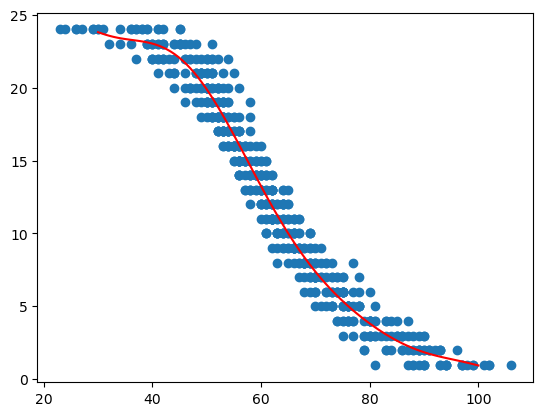

In [11]:
plt.scatter(x, y)
plt.plot(myline, mymodel(myline), color='red')

In [12]:
y_pred = mymodel(x)

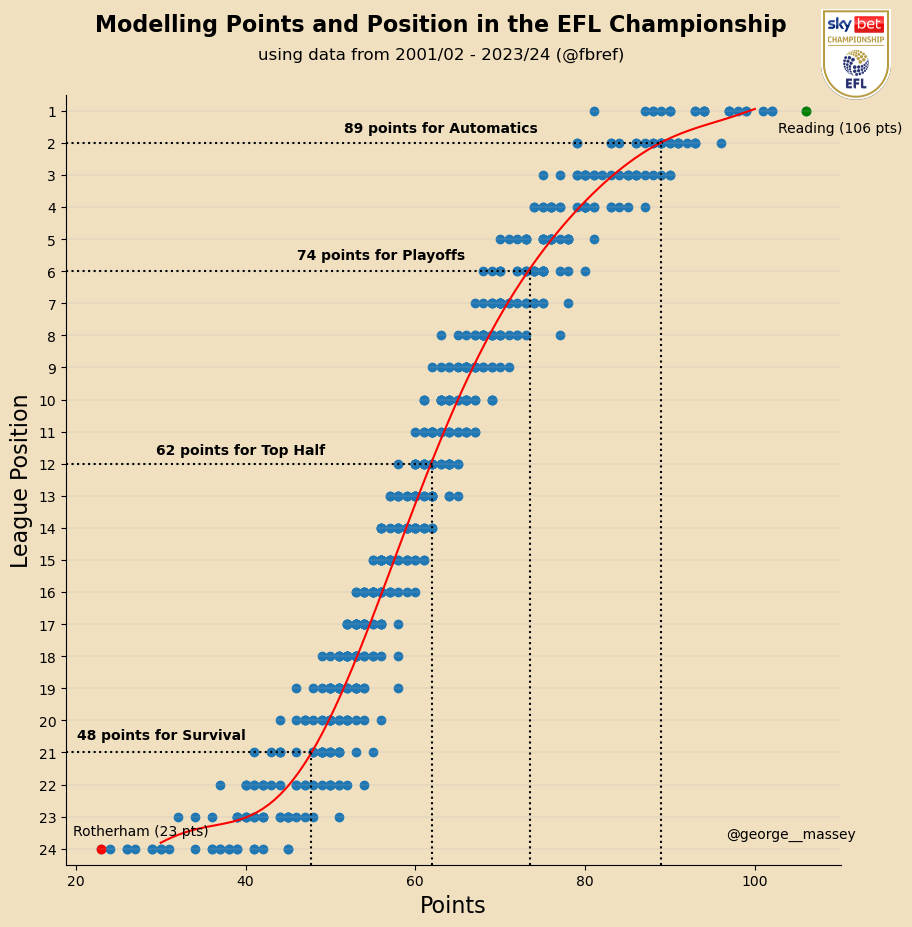

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

fig.set_facecolor('#F0E0C0')

plt.scatter(x, y)
plt.yticks([i for i in range(1, 25)])
plt.gca().invert_yaxis()
plt.plot(myline, mymodel(myline), color='red')
plt.ylim(24.5, 0.5)
plt.xlabel('Points', fontsize=16)
plt.ylabel('League Position', fontsize=16)
#plt.title('Linearly Modelling Points and League Position', fontsize=20)

# Label the data points
worst_points = 23 #df['Pts'].idxmin()
best_points = 106 #df['Pts'].idxmax()

worst_team_name = 'Rotherham' #df.loc[worst_points, 'Squad']
worst_season = '23 pts' #df.loc[worst_points, 'Year']
combined_worst = f"{worst_team_name} ({worst_season})"

best_team_name = 'Reading' #df.loc[best_points, 'Squad']
best_season = '106 pts' #df.loc[best_points, 'Year']
combined_best = f"{best_team_name} ({best_season})"

# Color the minimum and maximum points
ax.scatter(23, 24, color='red')
ax.scatter(106, 1, color='green')

# Annotate the minimum and maximum points
ax.annotate(combined_worst, (23, 24), xytext=(-20, 10), textcoords='offset points')
ax.annotate(combined_best, (106, 1), xytext=(-20, -15), textcoords='offset points')

# Add dotted lines from data points to x-axis
ax.axvline(x = 47.7, color='black', linestyle='dotted', ymax = 0.15)
ax.axvline(x = 62, color='black', linestyle='dotted', ymax = 0.52)
ax.axvline(x = 73.5, color='black', linestyle='dotted', ymax = 0.77)
ax.axvline(x = 89, color='black', linestyle='dotted', ymax = 0.94)
ax.axhline(y = 21, color='black', linestyle='dotted', xmax = 0.32)
ax.axhline(y = 12, color='black', linestyle='dotted', xmax = 0.473)
ax.axhline(y = 6, color='black', linestyle='dotted', xmax = 0.5995)
ax.axhline(y = 2, color='black', linestyle='dotted', xmax = 0.77)
# Remove right and top borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Annotate the expected points needed to finish 22nd
fig.text(0.22, 0.24, '48 points for Survival', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.3, 0.525, '62 points for Top Half', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.44, 0.72, '74 points for Playoffs', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.5, 0.847, '89 points for Automatics', ha='center', va='center', fontsize=10, color='black', weight='bold')
fig.text(0.5,0.95, 'Modelling Points and Position in the EFL Championship', ha='center', va='center', fontsize=16, color='black', weight='bold')
fig.text(0.5,0.92, 'using data from 2001/02 - 2023/24 (@fbref)', ha='center', va='center', fontsize=12, color='black')
fig.text(0.85,0.14, '@george__massey', ha='center', va='center', fontsize=10, color='black')
ax.set_facecolor('#F0E0C0')
plt.grid(axis='y', linewidth=0.2)
ax2 = fig.add_axes([.88,.87,.07,.10])
ax2.axis('off')
img = Image.open("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Championship_Logo.png")
ax2.imshow(img)
plt.show()

In [28]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Poly_Model_Points.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)